## <font size=5> <strong>Heart Disease Prediction By Team Niko
 

## I. Importing essential libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

C:\Users\nites\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## II. Importing and understanding our dataset 

In [3]:
dataset = pd.read_csv("heart.csv")

#### Description

In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Column details:

In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [7]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [8]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### SInce Target variables have only two values'0','1',it is a classification problem

### Checking correlation between columns

In [9]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [10]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

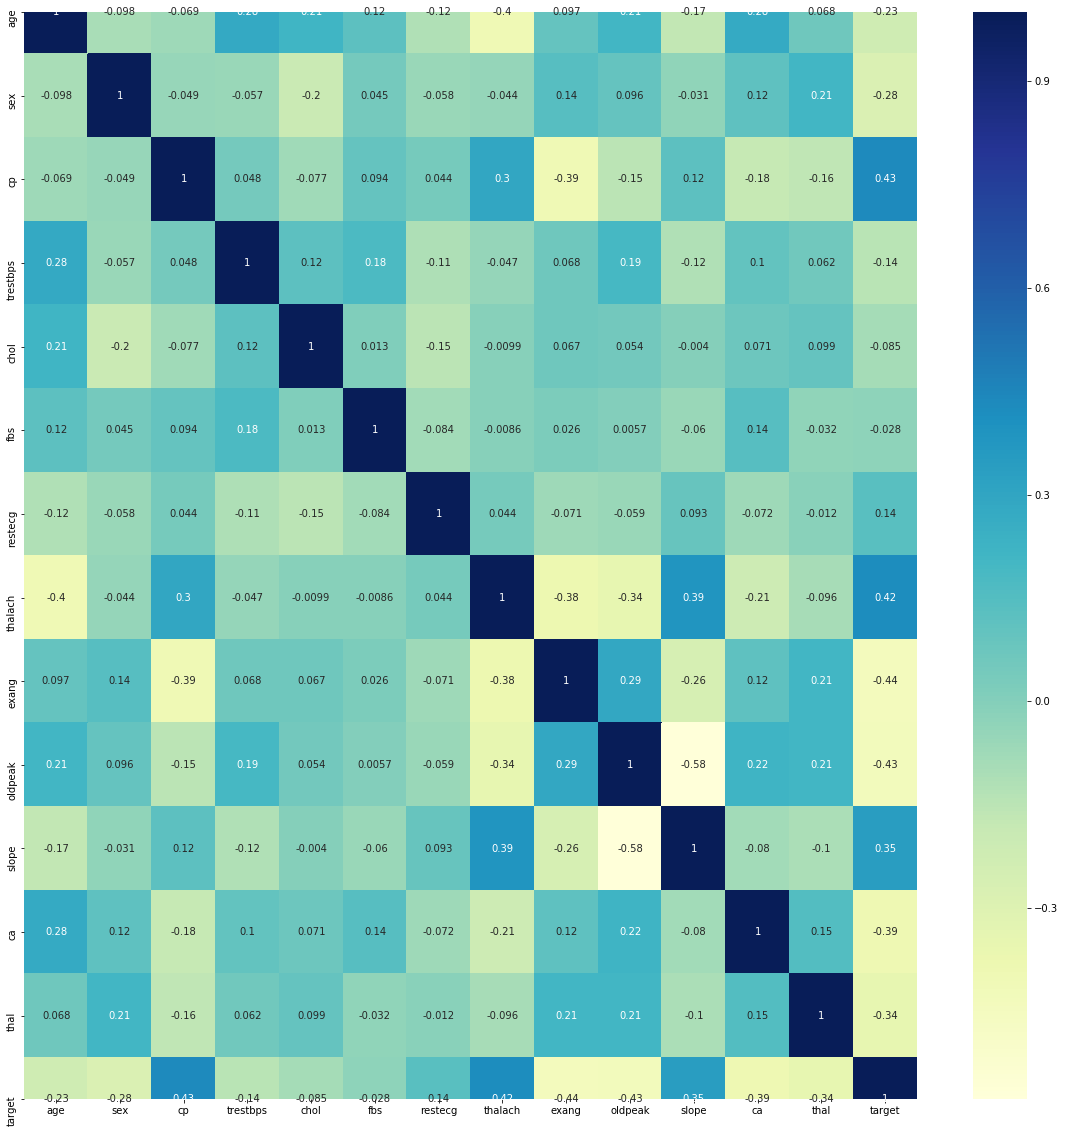

In [11]:
#get correlations of each features in dataset
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="YlGnBu")

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000127B9777F08>,
      dtype=object)

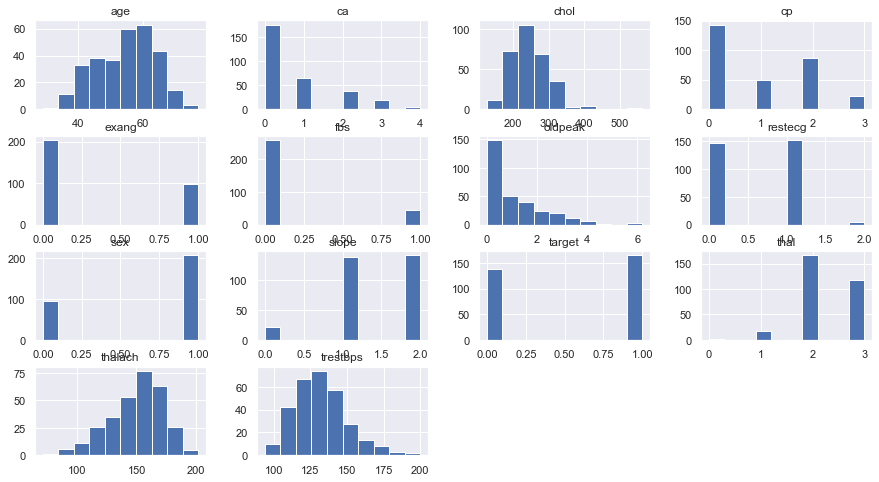

In [133]:
dataset.hist(histtype = 'barstacked')

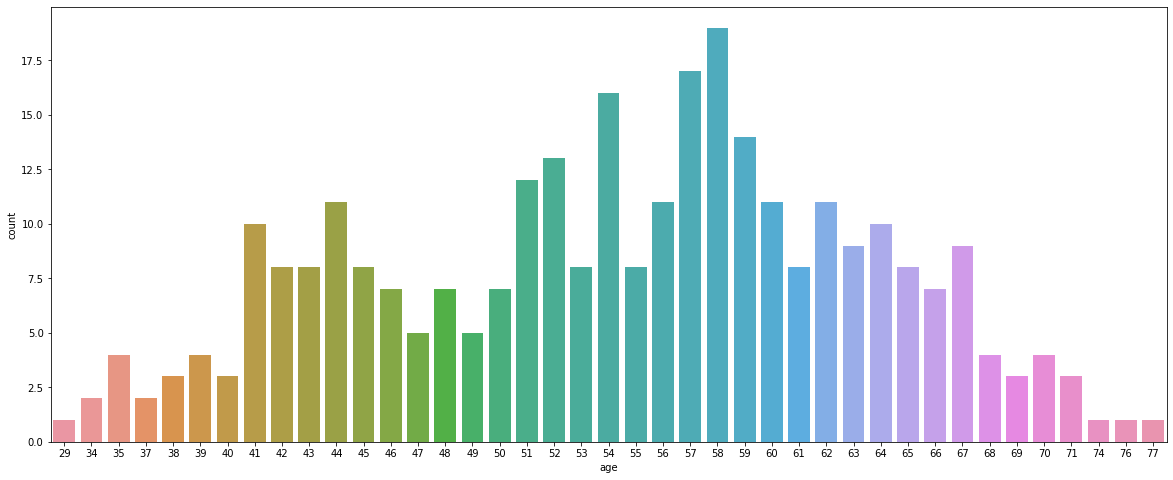

In [13]:
###Age and its relation to heart disease. Are young people more prone to heart disease? ###
plt.figure(figsize=(20,8))
sns.countplot(x=dataset['age'])
#age of 52 - 60 are more prone to heart disease

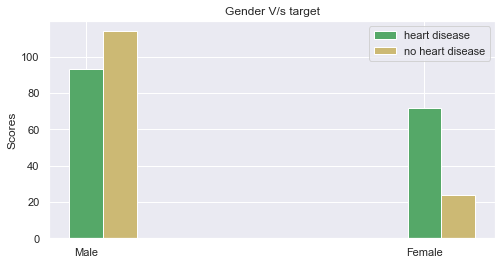

In [58]:
# Plot a bar graph for Gender V/s target
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize =(8,4))
heart_disease = [93, 72]
rects1 = ax.bar(ind, heart_disease, width, color='g')
no_heart_disease = [114, 24]
rects2 = ax.bar(ind+width, no_heart_disease, width, color='y')
ax.set_ylabel('Scores')
ax.set_title('Gender V/s target')
ax.set_xticks(ind)
ax.set_xticklabels(('Male','Female'))
ax.legend((rects1[0], rects2[0]), ('heart disease', 'no heart disease'))
plt.show()

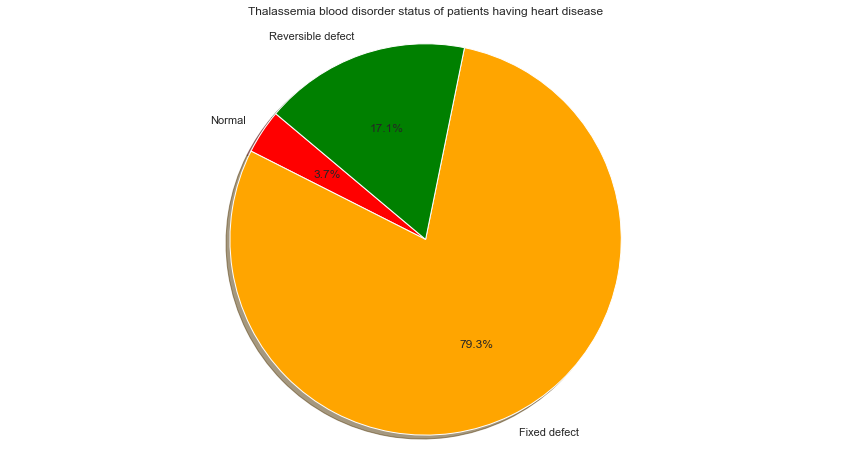

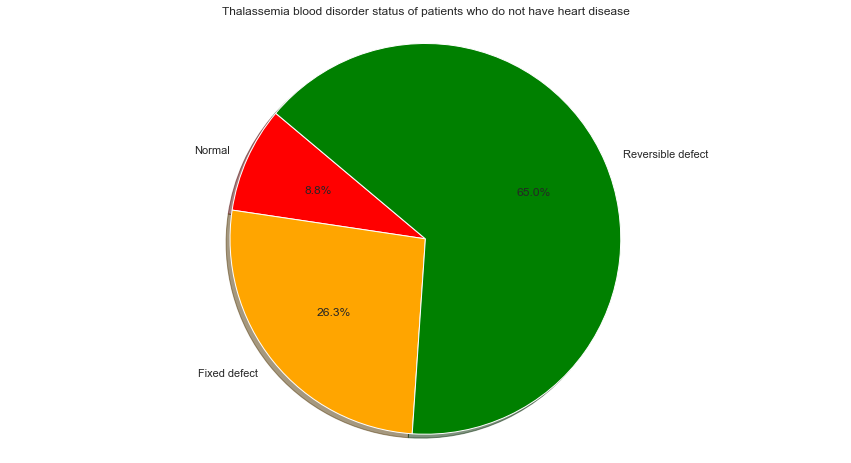

In [63]:
#Pie charts for thal:Thalassemia
# Having heart disease
labels= "Normal", "Fixed defect", "Reversible defect"
sizes=[6, 130, 28]
colors=["red", "orange", "green"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Thalassemia blood disorder status of patients having heart disease")
plt.show()
# Not having heart disease
labels= "Normal", "Fixed defect", "Reversible defect"
sizes=[12, 36, 89]
colors=["red", "orange", "green"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Thalassemia blood disorder status of patients who do not have heart disease")
plt.show()

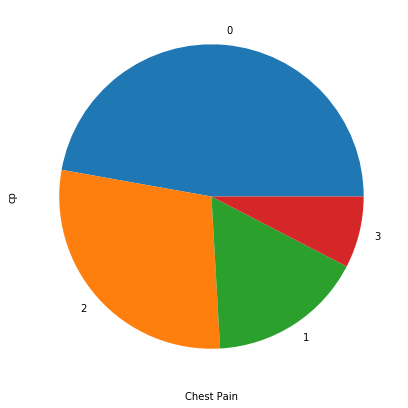

In [14]:
#Plotting types of chest pain
df1=dataset['cp'].value_counts()
df1
plt.figure(figsize=(10,7))
plt.xlabel('Chest Pain')
df1.plot.pie()

1    165
0    138
Name: target, dtype: int64


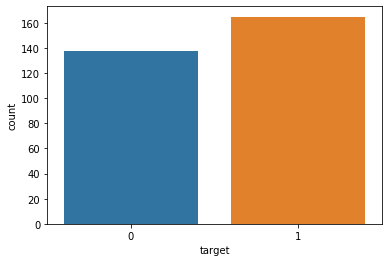

In [15]:
#Plotting target against count
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

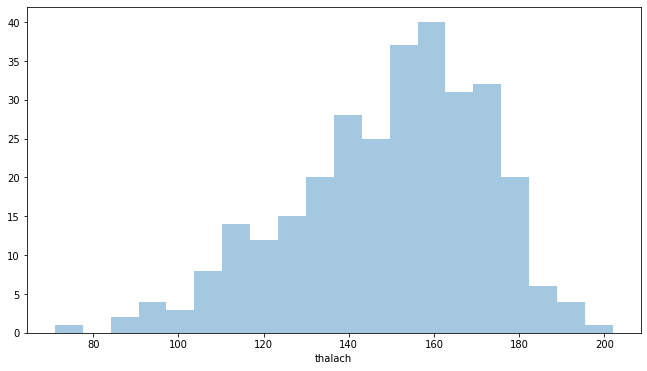

In [16]:
#maximum have a thalach between 160-170 i.e person having heart rate 160-170 suffer from heart disease
plt.figure(figsize=(11,6))
sns.distplot(dataset['thalach'],kde=False,bins=20)


In [17]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [18]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

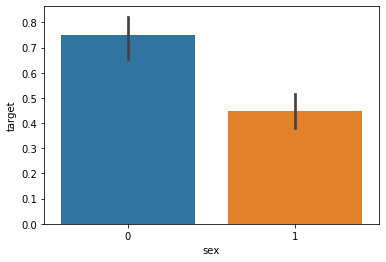

In [19]:
#Sex feature has two unique values
sns.barplot(dataset["sex"],y)

#### females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [20]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### the CP feature has values from 0 to 3

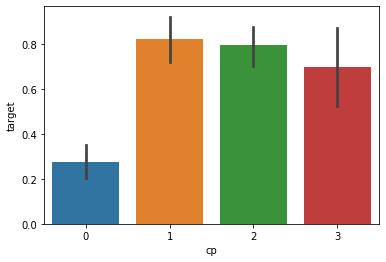

In [21]:
sns.barplot(dataset["cp"],y)

#####  Chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [22]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [23]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

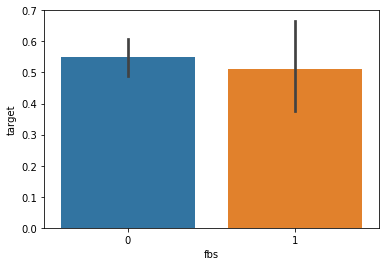

In [24]:
sns.barplot(dataset["fbs"],y)

### Analysing the restecg feature

In [25]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

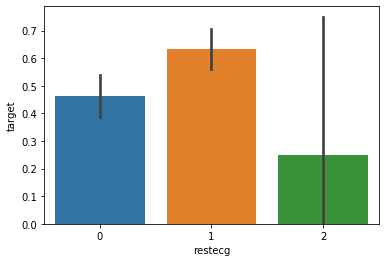

In [26]:
sns.barplot(dataset["restecg"],y)

##### people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [27]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

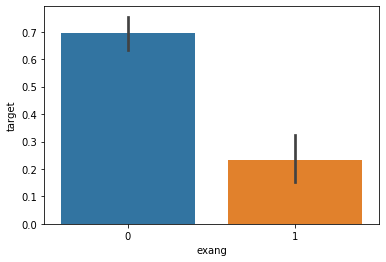

In [28]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [29]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

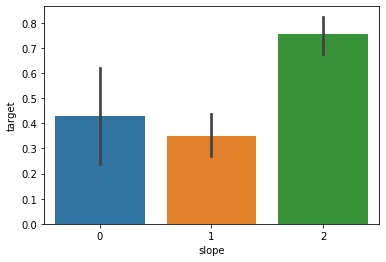

In [30]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [31]:
#number of major vessels (0-3) colored by flourosopy

In [32]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

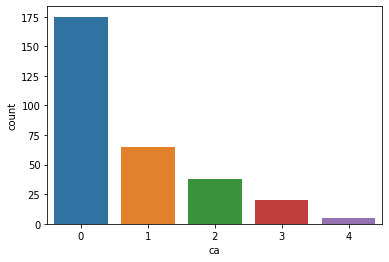

In [33]:
sns.countplot(dataset["ca"])

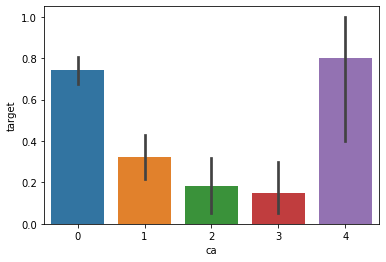

In [34]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

<h5>Analysing the 'thal' feature</h5>

In [35]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

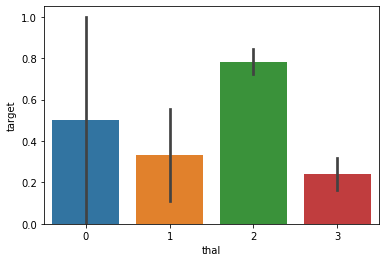

In [36]:
sns.barplot(dataset["thal"],y)

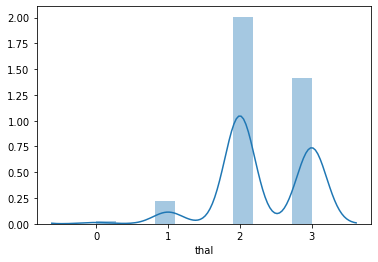

In [37]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [38]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [39]:
X_train.shape

(242, 13)

In [40]:
X_test.shape

(61, 13)

In [41]:
Y_train.shape

(242,)

In [42]:
Y_test.shape

(61,)

## V. Model Fitting

In [43]:
from sklearn.metrics import accuracy_score

In [76]:
## Base Learners
clfs = []
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [45]:
Y_pred_lr.shape

(61,)

In [77]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
clfs.append(lr)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [88]:
joblib.dump(lr, 'heart_disease.pkl')
model_classifierLR = joblib.load("heart_disease.pkl" )

[[22  5]
 [ 4 30]]


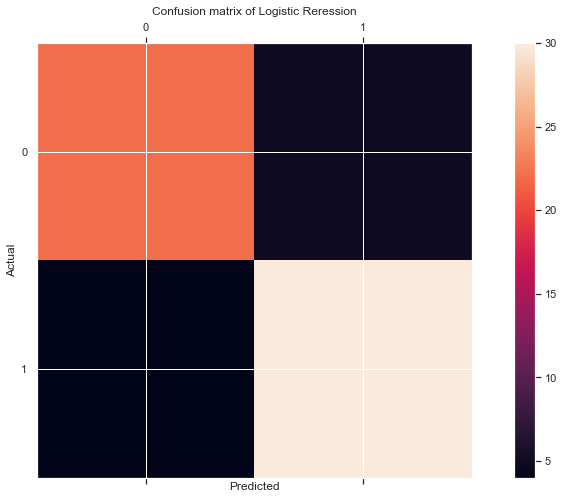

In [102]:
labels=[0,1]
cmx=confusion_matrix(Y_test,Y_pred_lr, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of Logistic Reression")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### MultinominalNaive Bayes

In [80]:

classifierNB=MultinomialNB()
classifierNB.fit(X_train,Y_train)
classifierNB.score(X_test, Y_test)
print("MultinomialNB LogLoss {score}".format(score=log_loss(Y_test, classifierNB.predict_proba(X_test))))
clfs.append(classifierNB)

MultinomialNB LogLoss 0.5929349271649782


In [48]:
Y_pred_nb.shape

(61,)

In [83]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
clfs.append(classifierNB)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")
joblib.dump(classifierNB, "heart_disease.pkl")
model_classifierNB = joblib.load("heart_disease.pkl" )

The accuracy score achieved using Naive Bayes is: 85.25 %


['heart_disease.pkl']

[[21  6]
 [ 3 31]]


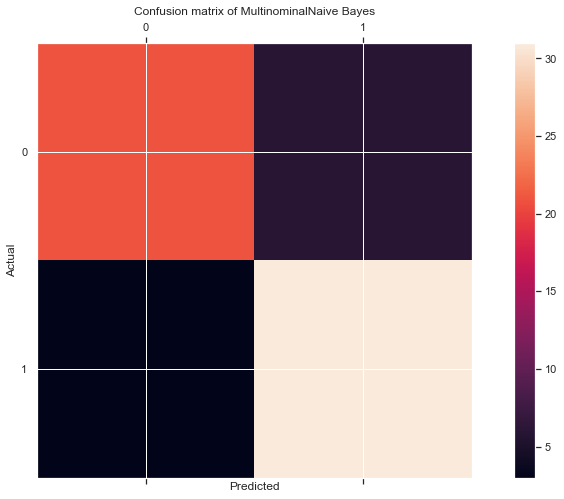

In [103]:
labels=[0,1]
cmx=confusion_matrix(Y_test,Y_pred_nb, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of MultinominalNaive Bayes")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
clfs.append(dt)

In [51]:
print(Y_pred_dt.shape)

(61,)


In [87]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")
joblib.dump(dt, "heart_disease.pkl")
model_classifierNB = joblib.load("heart_disease.pkl" )

The accuracy score achieved using Decision Tree is: 81.97 %


[[22  5]
 [ 6 28]]


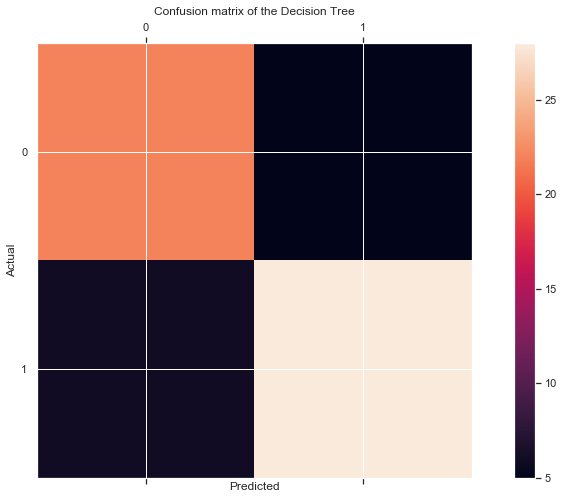

In [104]:
labels=[0,1]
cmx=confusion_matrix(Y_test,Y_pred_dt, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the Decision Tree")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
clfs.append(rf)

In [90]:
Y_pred_rf.shape

(61,)

In [91]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


In [92]:
joblib.dump(rf, "heart_disease.pkl")
model_classifierNB = joblib.load("heart_disease.pkl" )

[[27  0]
 [ 3 31]]


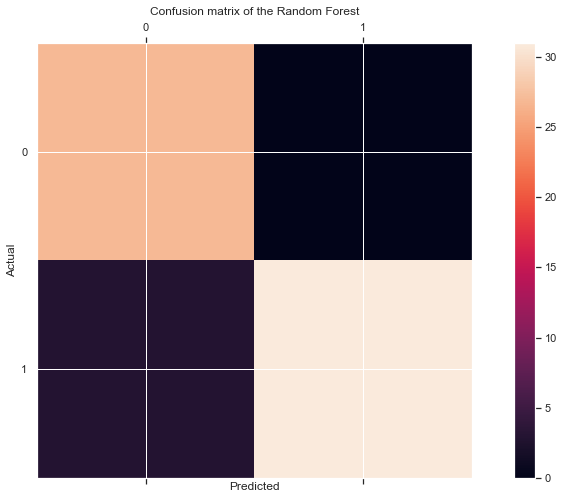

In [105]:
labels=[0,1]
cmx=confusion_matrix(Y_test,Y_pred_rf, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the Random Forest")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## VI. Output final score

In [56]:
scores = [score_lr,score_nb,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %


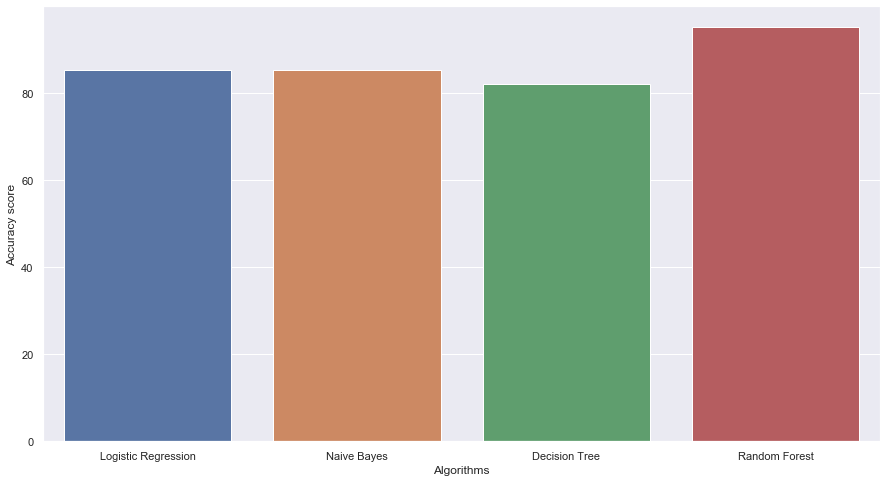

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

<h4>get predictions from best model above</h4>

majority_voting_accuracy:  0.8688524590163934


[[24  3]
 [ 5 29]]


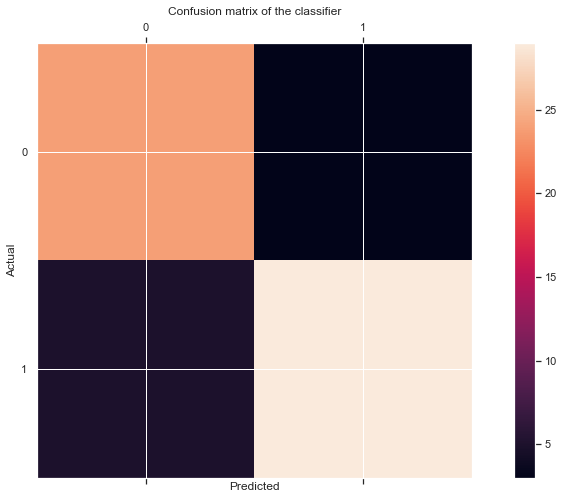



              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [108]:
# Ensemble Majority Voting Classifier
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[("nb", classifierNB), ("lr", lr), ("dt", dt),("rf", rf)]
#create our voting classifier, inputting our models
majority_voting = VotingClassifier(estimators, voting="hard")
#fit model to training data
majority_voting.fit(X_train, Y_train)
#test our model on the test data
majority_voting.score(X_test, Y_test)
# save best model to current working directory
joblib.dump(majority_voting, 'heart_disease.pkl')
# load from file and predict using the best configs found in the CV step
model_max_v = joblib.load('heart_disease.pkl' )
# get predictions from best model above
Y_preds = model_max_v.predict(X_test)
print("majority_voting_accuracy: ",majority_voting.score(X_test, Y_test))
print("\n")
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,Y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")
print(classification_report(Y_test, Y_preds))


<h3>Ensemble Classifiers</h3>

<h4>Bagging</h4>

bagging_accuracy score:  0.819672131147541


[[20  7]
 [ 4 30]]


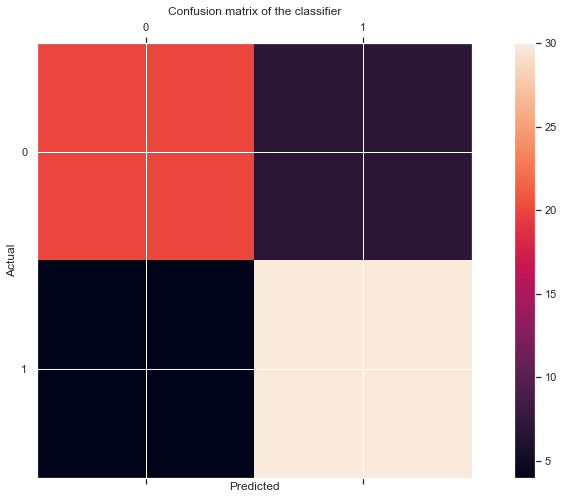



              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [122]:
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(X_train,Y_train)
classifierBa.score(X_test, Y_test)
joblib.dump(classifierBa, 'heart_disease.pkl')
model_bagging = joblib.load('heart_disease.pkl' )
y_preds = model_bagging.predict(X_test)
print("bagging_accuracy score: ",accuracy_score(Y_test, y_preds))
print("\n")
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")
print(classification_report(Y_test, y_preds))

#### Adaptive Boosting(AdaBoost)

Ada_boost_accuracy score:  0.8688524590163934


[[25  2]
 [ 6 28]]


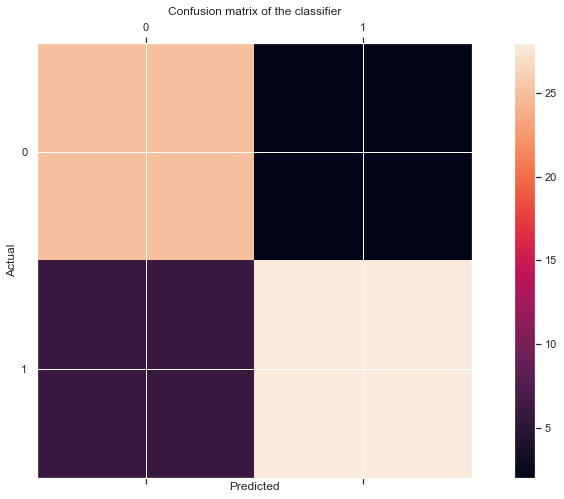



              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.93      0.82      0.87        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [126]:
classifierAdaBoost= AdaBoostClassifier(n_estimators=500)
classifierAdaBoost.fit(X_train,Y_train)
classifierAdaBoost.score(X_test, Y_test)

joblib.dump(classifierAdaBoost, 'heart_disease.pkl')

model_Ada_boost = joblib.load('heart_disease.pkl' )

y_preds = model_Ada_boost.predict(X_test)
print("Ada_boost_accuracy score: ",accuracy_score(Y_test, y_preds))
print("\n")
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")
print(classification_report(Y_test, y_preds))

### Gradient Boosting

Gradient_boosting_accuracy score:  0.8524590163934426


[[24  3]
 [ 6 28]]


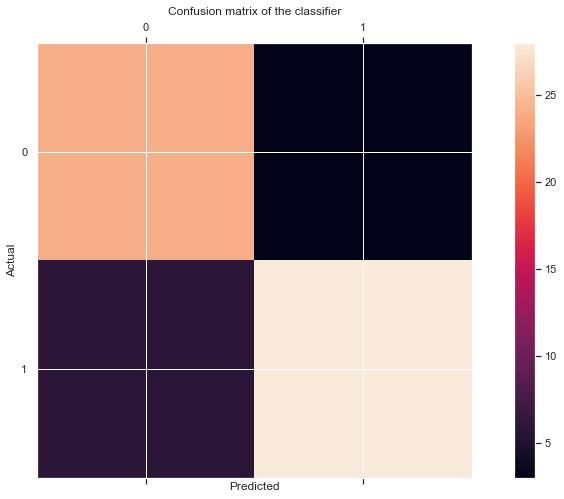



              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [128]:
from sklearn.ensemble import GradientBoostingClassifier
classifierGBo= GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1)
classifierGBo.fit(X_train,Y_train)
classifierGBo.score(X_test, Y_test)

joblib.dump(classifierGBo, 'heart_disease.pkl')

model_Gradient_boosting = joblib.load('heart_disease.pkl' )

y_preds = model_Gradient_boosting.predict(X_test)
print("Gradient_boosting_accuracy score: ",accuracy_score(Y_test, y_preds))
print("\n")
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(Y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title("Confusion matrix of the classifier")
fig.colorbar(cax)
ax.set_xticklabels([""] + labels)
ax.set_yticklabels([""] + labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")
print(classification_report(Y_test, y_preds))

# Accuracy of Ensemble combination methods & Ensemble classifiers

In [130]:
print("\n")
print("Majority Voting accuracy score: ",majority_voting.score(X_test, Y_test))
print("Bagging_accuracy score: ",classifierBa.score(X_test, Y_test))
print("Ada_boost_accuracy score: ",classifierAdaBoost.score(X_test, Y_test))
print("Gradient_boosting_accuracy score: ",classifierGBo.score(X_test, Y_test))



Majority Voting accuracy score:  0.8688524590163934
Bagging_accuracy score:  0.819672131147541
Ada_boost_accuracy score:  0.8688524590163934
Gradient_boosting_accuracy score:  0.8524590163934426


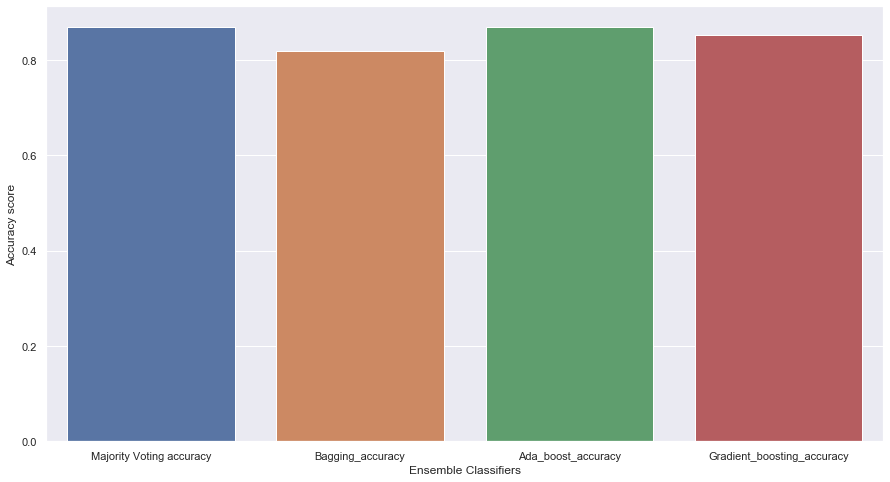

In [132]:
scores = [majority_voting.score(X_test, Y_test),classifierBa.score(X_test, Y_test),classifierAdaBoost.score(X_test, Y_test),classifierGBo.score(X_test, Y_test)]
algorithms = ["Majority Voting accuracy","Bagging_accuracy","Ada_boost_accuracy","Gradient_boosting_accuracy"]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Ensemble Classifiers")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)